In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
cd Compet-DSR-one

/Users/pauljewell/DSR/Competitions/Compet-DSR-one


In [44]:
# Read in data files 
train_features = pd.read_csv('./data/dengue_features_train.csv')
train_target = pd.read_csv('./data/dengue_labels_train.csv')
test_features = pd.read_csv('./data/dengue_features_test.csv')

In [95]:
df = train_features.copy()
df = df.fillna(method='ffill')
df.isnull().sum().sum()

0

In [96]:
X_iq = df[df.city == 'iq'] 
y_iq = train_target.loc[train_target.city == 'iq', 'total_cases'] 
X_sj = df[df.city == 'sj'] 
y_sj = train_target.loc[train_target.city == 'sj', 'total_cases'] 

In [353]:
train_features.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

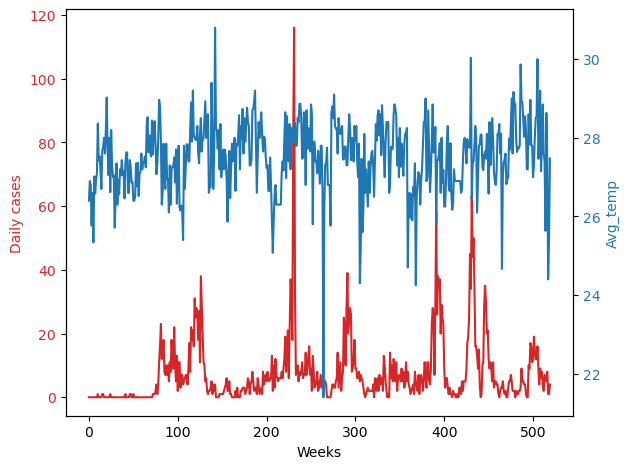

In [48]:

data1 = y_iq
data2 = X_iq['station_avg_temp_c']

fig, ax1 = plt.subplots()

t = np.arange(520)

color = 'tab:red'
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Daily cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/762336201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_iq['station_avg_temp_c_shift'] = X_iq['station_avg_temp_c'].shift(10)


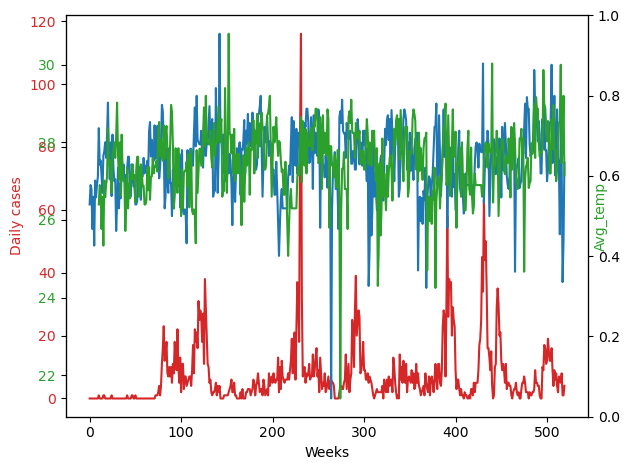

In [50]:
# Now try with shifting 
X_iq['station_avg_temp_c_shift'] = X_iq['station_avg_temp_c'].shift(10)


data1 = y_iq
data2 = X_iq['station_avg_temp_c']
data3 = X_iq['station_avg_temp_c_shift']

fig, ax1 = plt.subplots()

t = np.arange(520)

color = 'tab:red'
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Daily cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/1460957849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_iq['station_avg_temp_c_rolling'] = X_iq.loc[:,'station_avg_temp_c'].rolling(8,center=True).mean()


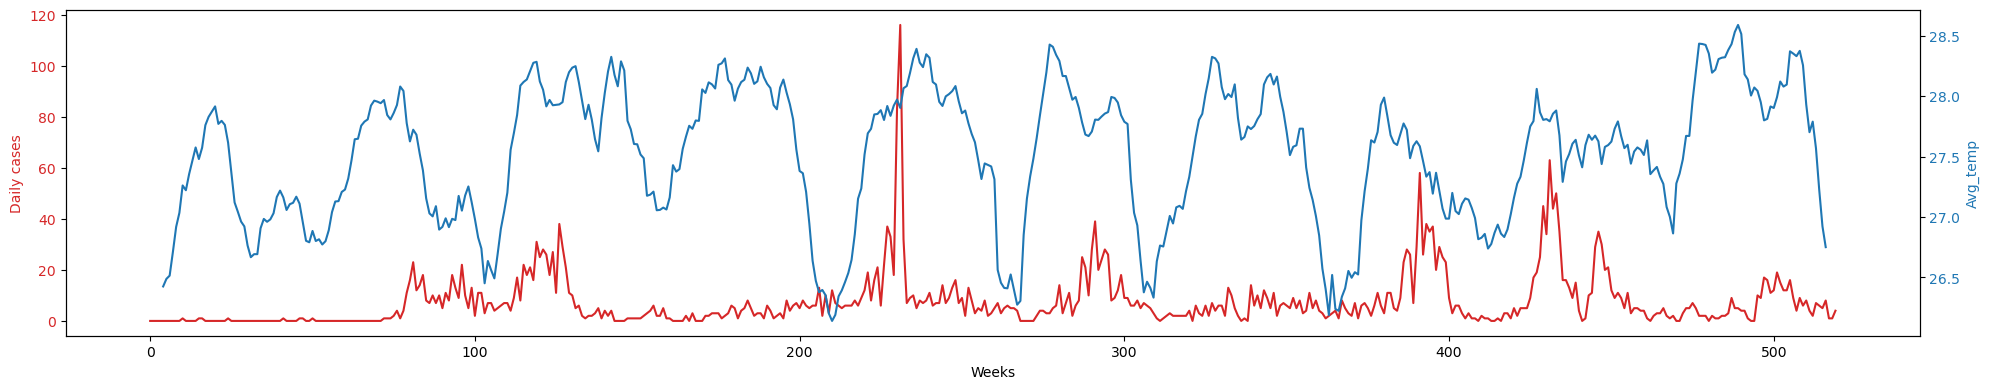

In [94]:
# Now try with rolling average 

X_iq['station_avg_temp_c_rolling'] = X_iq.loc[:,'station_avg_temp_c'].rolling(8,center=True).mean()

data1 = y_iq
data2 = X_iq['station_avg_temp_c']
data3 = X_iq['station_avg_temp_c_rolling']

fig, ax1 = plt.subplots(figsize=(20,4))

t = np.arange(520)

color = 'tab:red'
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Daily cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

""" ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
 """

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [59]:
iq.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/4055624783.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_iq['station_precip_mm_rolling'] = X_iq.loc[:,'station_precip_mm'].rolling(6,center=True).mean()


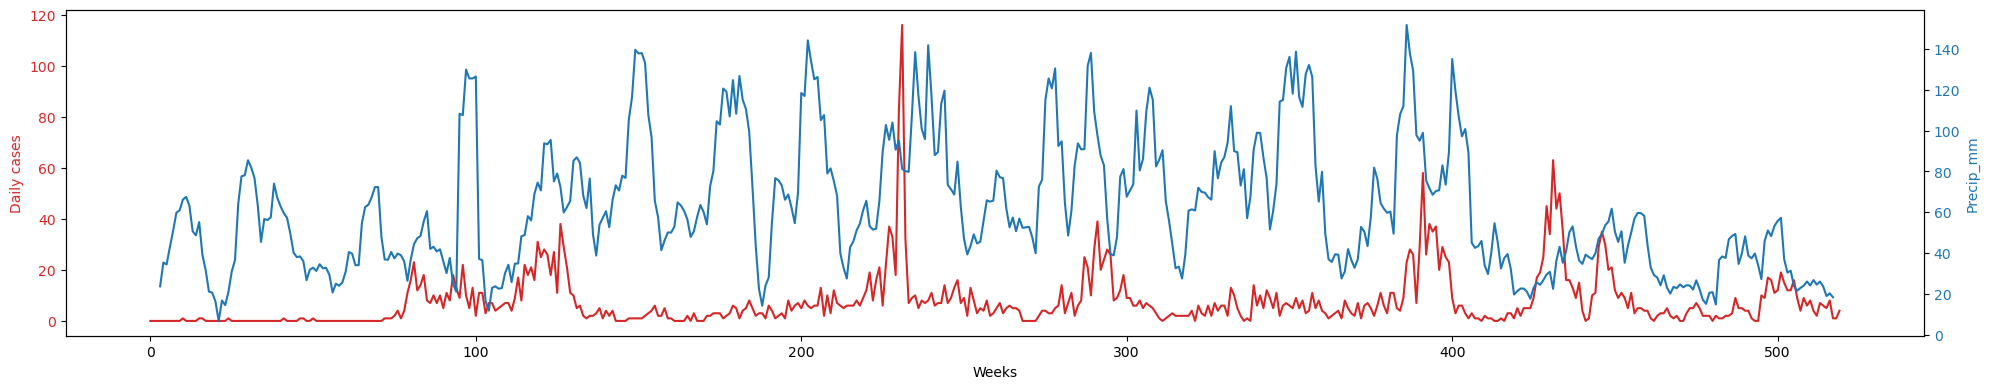

In [90]:
# Now try with rolling average 

X_iq['station_precip_mm_rolling'] = X_iq.loc[:,'station_precip_mm'].rolling(6,center=True).mean()

data1 = y_iq
data2 = X_iq['station_precip_mm']
data3 = X_iq['station_precip_mm_rolling']

fig, ax1 = plt.subplots(figsize=(20,4))

t = np.arange(520)

color = 'tab:red'
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Daily cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Precip_mm', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

""" ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
 """

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/2847936060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_iq['reanalysis_relative_humidity_percent_rolling'] = X_iq.loc[:,'reanalysis_relative_humidity_percent'].rolling(4,center=True).mean()


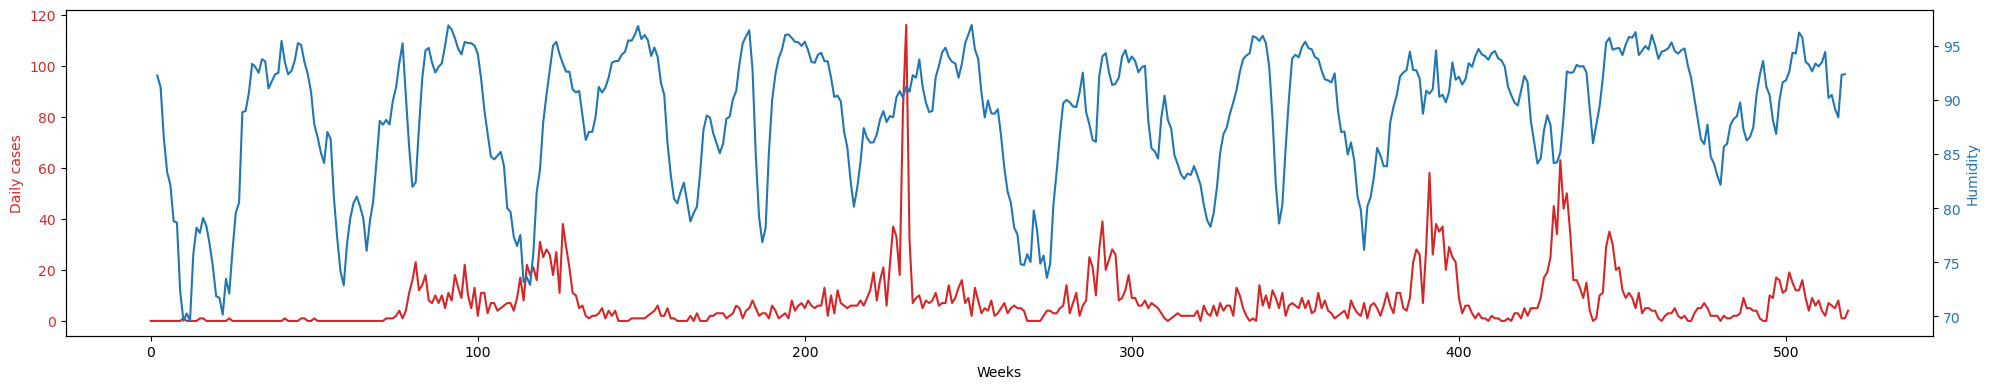

In [91]:
# Now try with rolling average 

X_iq['reanalysis_relative_humidity_percent_rolling'] = X_iq.loc[:,'reanalysis_relative_humidity_percent'].rolling(4,center=True).mean()

data1 = y_iq
data2 = X_iq['reanalysis_relative_humidity_percent']
data3 = X_iq['reanalysis_relative_humidity_percent_rolling']

fig, ax1 = plt.subplots(figsize=(20,4))

t = np.arange(520)

color = 'tab:red'
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Daily cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Humidity', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

""" ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
 """

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/596419116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_iq['ndvi_ne_rolling'] = X_iq.loc[:,'ndvi_ne'].rolling(8,center=True).mean()


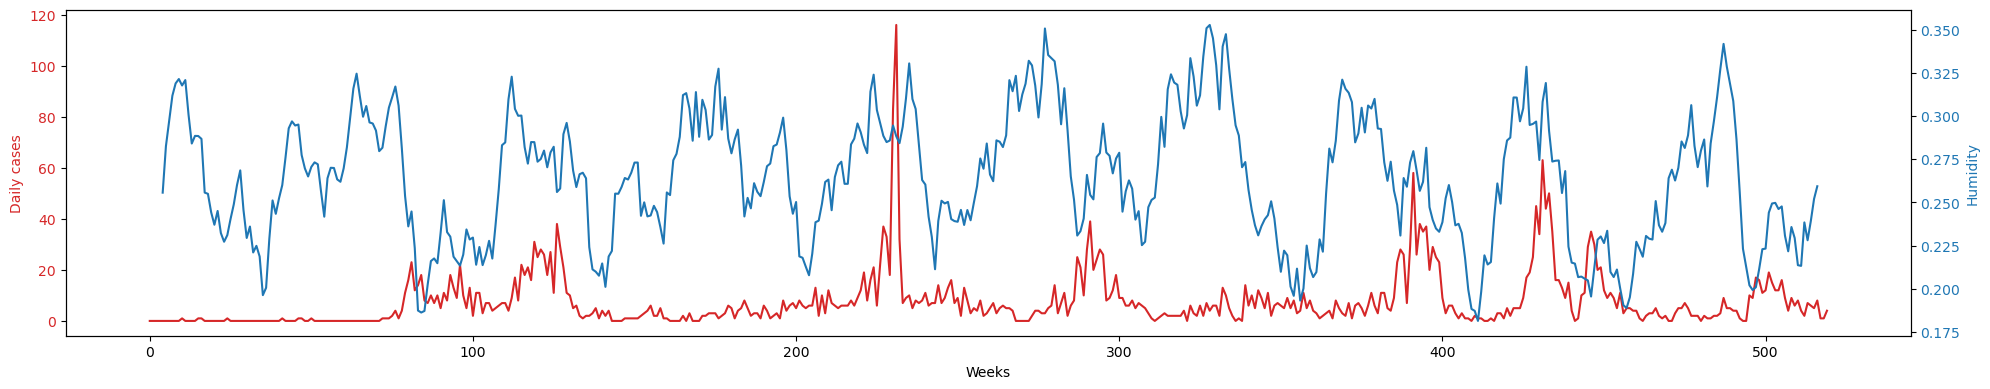

In [93]:
# Now try with rolling average 

X_iq['ndvi_ne_rolling'] = X_iq.loc[:,'ndvi_ne'].rolling(8,center=True).mean()

data1 = y_iq
data2 = X_iq['ndvi_ne']
data3 = X_iq['ndvi_ne_rolling']

fig, ax1 = plt.subplots(figsize=(20,4))

t = np.arange(520)

color = 'tab:red'
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Daily cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Humidity', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

""" ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
 """

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/935975104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sj['station_avg_temp_c_rolling'] = X_sj.loc[:,'station_avg_temp_c'].rolling(8,center=False).mean()


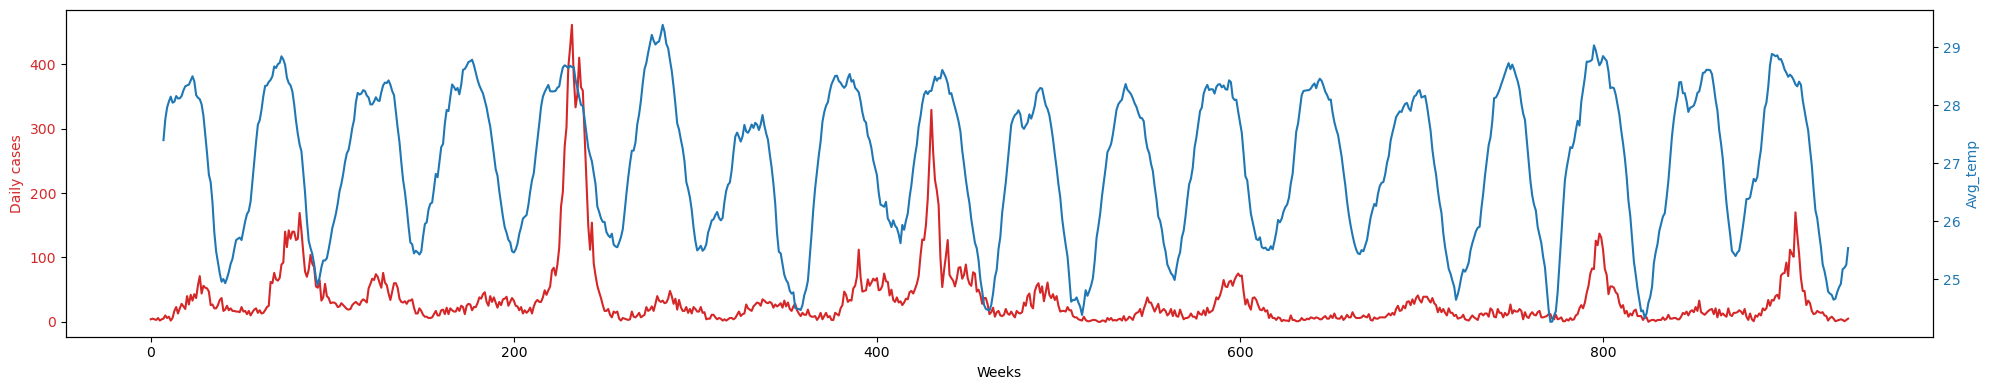

In [103]:
X_sj['station_avg_temp_c_rolling'] = X_sj.loc[:,'station_avg_temp_c'].rolling(8,center=False).mean()

data1 = y_sj
data2 = X_sj['station_avg_temp_c']
data3 = X_sj['station_avg_temp_c_rolling']

fig, ax1 = plt.subplots(figsize=(20,4))

t = np.arange(936)

color = 'tab:red'
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Daily cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

""" ax3 = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Avg_temp', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data3, color=color)
ax2.tick_params(axis='y', labelcolor=color)
 """

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [101]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [173]:
data = X_sj
y = y_sj
feature = 'reanalysis_max_air_temp_k'

def rolling_chart(data, y, feature, city, rolling=8, set_center=False):
    data1 = y
    data2 = data.loc[:, feature].rolling(rolling, center=set_center).mean()

    fig, ax1 = plt.subplots(figsize=(20,4))

    if city == 'iq':
        size_y = 520
    elif city == 'sj':
        size_y = 936
    t = np.arange(size_y)

    color = 'tab:red'
    ax1.set_xlabel('Weeks')
    ax1.set_ylabel('Daily cases', color=color)
    ax1.plot(t, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(feature, color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    return plt.show()

In [179]:
X_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'station_avg_temp_c_rolling',
       'ndvi_ne_rolling', 'ndvi_nw_rolling', 'ndvi_se_rolling',
       'ndvi_sw_rolling', 'precipitation_amt_mm_rolling',
       'reanalysis_air_temp_k_rolling', 'reanalysis_avg_temp_k_rolling',
       'reanalysis_dew_point_temp_k_rolling'],
      dtype='object')

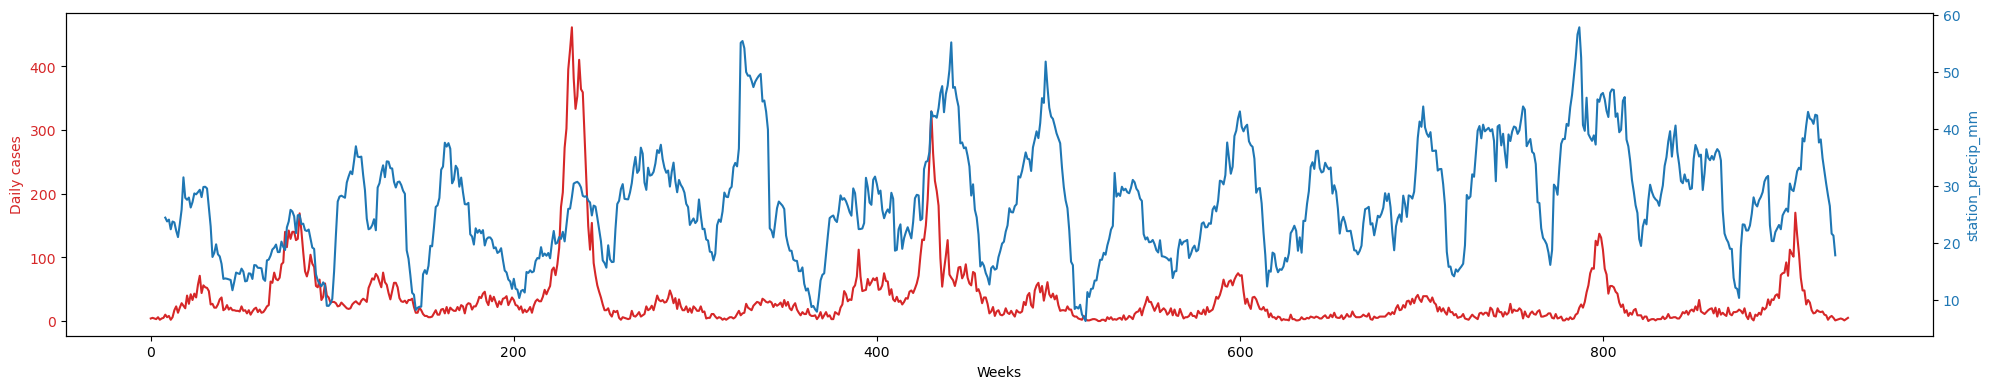

In [319]:
data = X_sj
y = y_sj
feature = 'station_precip_mm'
city = 'sj'

rolling_chart(data, y, feature, city, rolling=16, set_center=True)


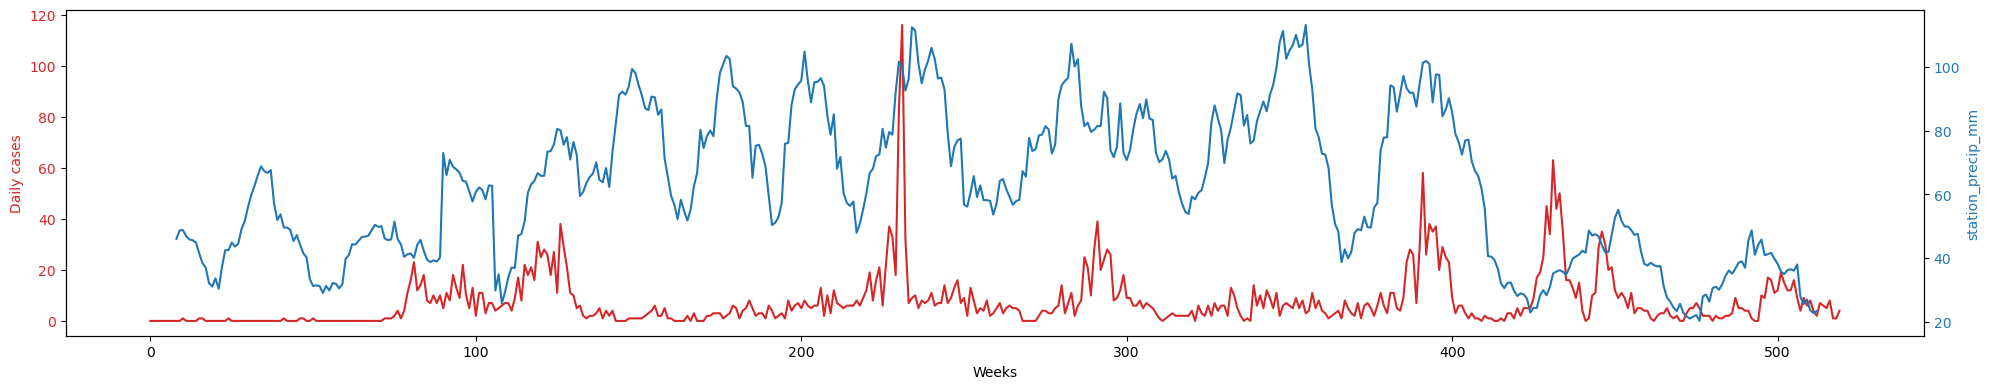

In [320]:
data = X_iq
y = y_iq
feature = 'station_precip_mm'
city = 'iq'

rolling_chart(data, y, feature, city, rolling=16, set_center=True)

In [334]:
def add_rolling(data, city, fillna=True):

    data['ndvi_ne_rolling'] = data.loc[:,'ndvi_ne'].rolling(20,center=False).mean()
    data['ndvi_nw_rolling'] = data.loc[:,'ndvi_nw'].rolling(20,center=False).mean()
    data['precipitation_amt_mm_rolling'] = data.loc[:,'precipitation_amt_mm'].rolling(12, center=True).mean()
    data['reanalysis_air_temp_k_rolling'] = data.loc[:,'reanalysis_air_temp_k'].rolling(12, center=False).mean()
    data['reanalysis_avg_temp_k_rolling'] = data.loc[:,'reanalysis_avg_temp_k'].rolling(16, center=False).mean()
    data['reanalysis_dew_point_temp_k_rolling'] = data.loc[:,'reanalysis_dew_point_temp_k'].rolling(8, center=True).mean()
    data['reanalysis_max_air_temp_k_rolling'] = data.loc[:,'reanalysis_max_air_temp_k'].rolling(18, center=False).mean()
    data['reanalysis_precip_amt_kg_per_m2_rolling'] = data.loc[:,'reanalysis_precip_amt_kg_per_m2'].rolling(10, center=True).mean()
    data['reanalysis_relative_humidity_percent_rolling'] = data.loc[:,'reanalysis_relative_humidity_percent'].rolling(20, center=True).mean()
    data['reanalysis_sat_precip_amt_mm_rolling'] = data.loc[:,'reanalysis_sat_precip_amt_mm'].rolling(30, center=True).mean()
    data['reanalysis_specific_humidity_g_per_kg_rolling'] = data.loc[:,'reanalysis_specific_humidity_g_per_kg'].rolling(8, center=False).mean()
    data['reanalysis_tdtr_k_rolling'] = data.loc[:,'reanalysis_tdtr_k'].rolling(24, center=False).mean()
    data['station_avg_temp_c_rolling'] = data.loc[:,'station_avg_temp_c'].rolling(12, center=False).mean()
    data['station_diur_temp_rng_c_rolling'] = data.loc[:,'station_diur_temp_rng_c'].rolling(16, center=False).mean()
    data['station_max_temp_c_rolling'] = data.loc[:,'station_max_temp_c'].rolling(12, center=False).mean()
    data['station_precip_mm_rolling'] = data.loc[:,'station_precip_mm'].rolling(16, center=True).mean()

    if city == 'iq':
        data['ndvi_se_rolling'] = data.loc[:,'ndvi_se'].rolling(18,center=False).mean()
        data['ndvi_sw_rolling'] = data.loc[:,'ndvi_sw'].rolling(16,center=False).mean()
        data['reanalysis_min_air_temp_k_rolling'] = data.loc[:,'reanalysis_min_air_temp_k'].rolling(8,center=True).mean()
        data['station_min_temp_c_rolling'] = data.loc[:,'station_min_temp_c'].rolling(12,center=True).mean()

    elif city == 'sj': 
        data['ndvi_se_rolling'] = data.loc[:,'ndvi_se'].rolling(16,center=False).mean()
        data['ndvi_sw_rolling'] = data.loc[:,'ndvi_sw'].rolling(12,center=False).mean()
        data['reanalysis_min_air_temp_k_rolling'] = data.loc[:,'reanalysis_min_air_temp_k'].rolling(12,center=False).mean()
        data['station_min_temp_c_rolling'] = data.loc[:,'station_min_temp_c'].rolling(12,center=False).mean()

    if fillna: 
        data = data.fillna(method='ffill')
        data = data.fillna(method='bfill')

    return data


In [335]:
train_features = pd.read_csv('./data/dengue_features_train.csv')
df = train_features.copy()
df = df.fillna(method='ffill')
df.isnull().sum().sum()
X_iq = df[df.city == 'iq'] 
X_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [337]:
df_rolling = add_rolling(X_iq, city='iq') 

df_rolling.isnull().sum()

/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/569778568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ndvi_ne_rolling'] = data.loc[:,'ndvi_ne'].rolling(20,center=False).mean()
/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/569778568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ndvi_nw_rolling'] = data.loc[:,'ndvi_nw'].rolling(20,center=False).mean()
/var/folders/4f/h4n221vs5_x_ywbpp1g7jf640000gn/T/ipykernel_88679/569778568.py:5: SettingWithCopyWa

city                                             0
year                                             0
weekofyear                                       0
week_start_date                                  0
ndvi_ne                                          0
ndvi_nw                                          0
ndvi_se                                          0
ndvi_sw                                          0
precipitation_amt_mm                             0
reanalysis_air_temp_k                            0
reanalysis_avg_temp_k                            0
reanalysis_dew_point_temp_k                      0
reanalysis_max_air_temp_k                        0
reanalysis_min_air_temp_k                        0
reanalysis_precip_amt_kg_per_m2                  0
reanalysis_relative_humidity_percent             0
reanalysis_sat_precip_amt_mm                     0
reanalysis_specific_humidity_g_per_kg            0
reanalysis_tdtr_k                                0
station_avg_temp_c             

In [333]:
df_rolling.to_csv('df_rolling.csv', index=False)

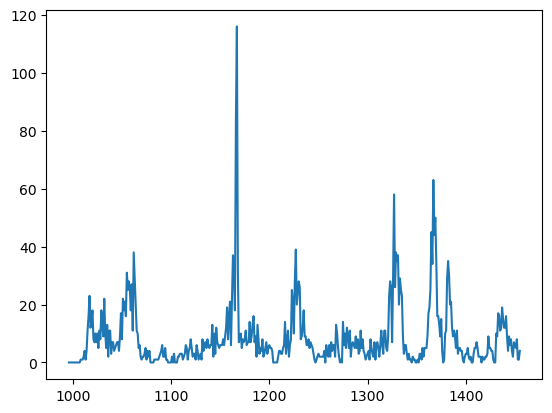

In [352]:
plt.plot(y_iq.iloc[60:])

In [345]:
y_iq.iloc[:10]

936    0
937    0
938    0
939    0
940    0
941    0
942    0
943    0
944    0
945    0
Name: total_cases, dtype: int64